In [9]:
import sys
sys.path.append("../lib/")
import os
import numpy as np
import pandas as pd
from natsort import natsorted, ns
from pathlib import Path

import matplotlib.pyplot as plt

from raman_lib.opus_converter import convert_opus
from raman_lib.misc import load_data
from raman_lib.visualization import plot_spectra_peaks

## Setup

In [10]:
dataset = "L_540_2022_C_E_R_B"
#dataset = "database"


## Before Preprocessing (Raw Data)

In [11]:
data = pd.read_csv(f"../data/{dataset}.csv")

X = data.loc[:, ~data.columns.isin(["label", "file"])]
wns = X.columns.astype(float)

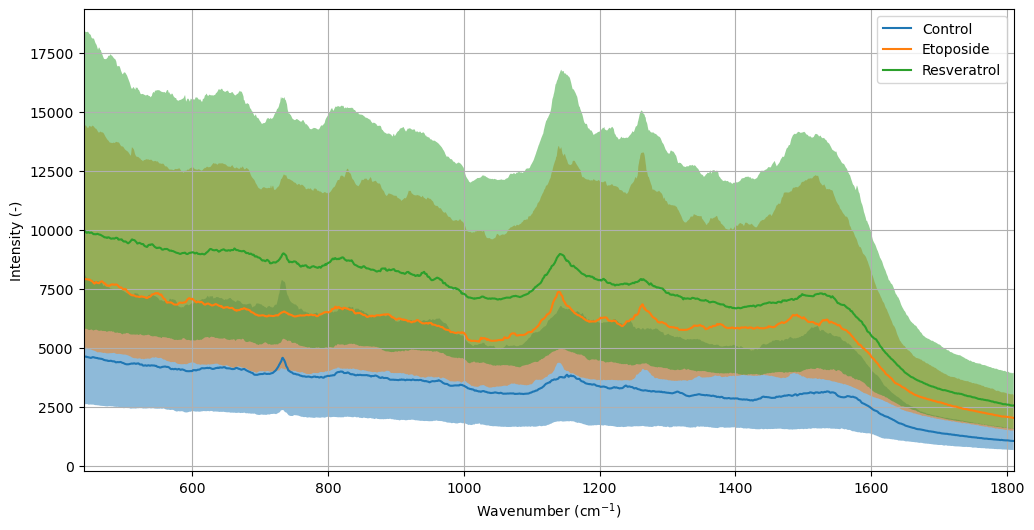

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
for label, group in X.groupby(data.label):
    ax.plot(wns, group.median(axis=0), label=label)
    ax.fill_between(wns, group.quantile(q=0.25, axis=0), group.quantile(q=0.75, axis=0), alpha=0.5)
ax.set_xlabel("Wavenumber ($\mathregular{cm^{-1}}$)")
ax.set_ylabel("Intensity (-)")
ax.set_xmargin(0)
ax.grid()
ax.legend()

## After Preprocessing

In [13]:
data = pd.read_csv(f"../results/{dataset}/{dataset}_preprocessed.csv")

X = data.loc[:, ~data.columns.isin(["label", "file"])]
wns = X.columns.astype(float)

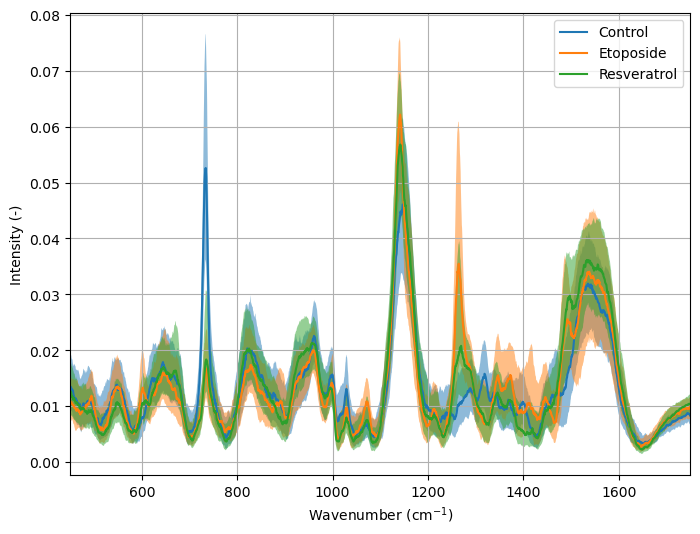

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, group in X.groupby(data.label):
    ax.plot(wns, group.median(axis=0), label=label)
    ax.fill_between(wns, group.quantile(q=0.25, axis=0), group.quantile(q=0.75, axis=0), alpha=0.5)
ax.set_xlabel("Wavenumber ($\mathregular{cm^{-1}}$)")
ax.set_ylabel("Intensity (-)")
ax.set_xmargin(0)
ax.grid()
ax.legend()